In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [5]:
csvfile = '/Users/rushil/PH_Website/steps_test.csv.gz'
df = pd.read_csv(csvfile, compression='gzip')

print(df.head())

         value     q gender  age_cat
0   162.333333  0.00   Male  [20,30)
1  2087.333333  0.01   Male  [20,30)
2  2422.571429  0.02   Male  [20,30)
3  2953.800000  0.03   Male  [20,30)
4  3292.285714  0.04   Male  [20,30)


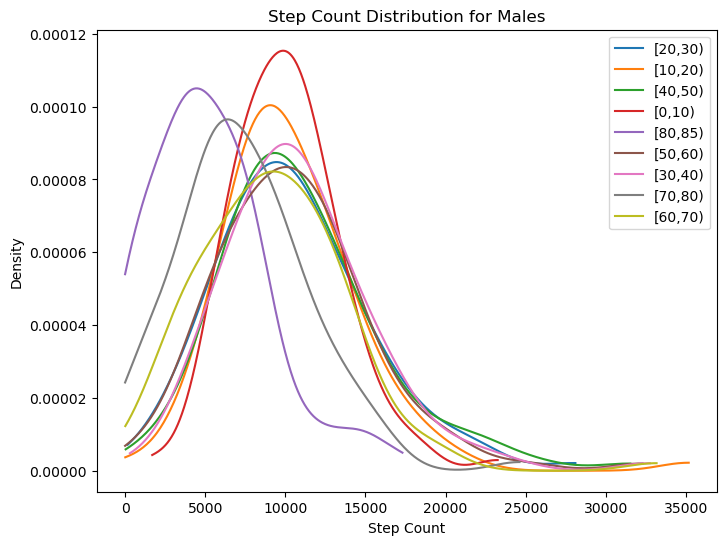

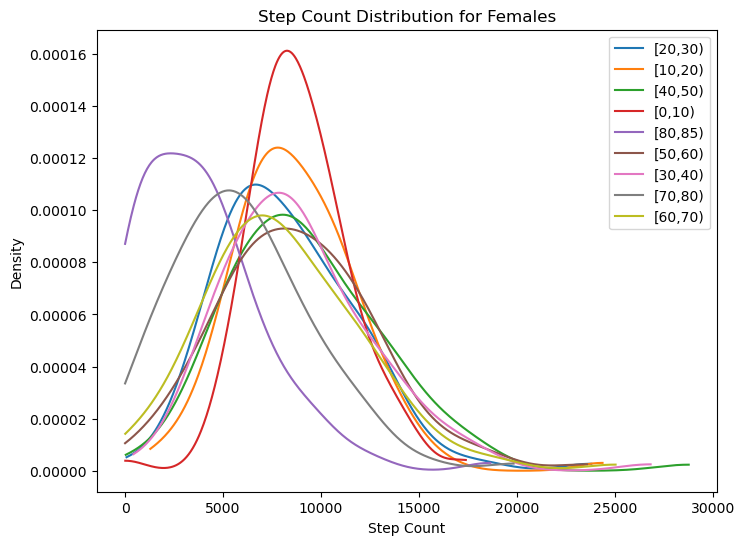

In [9]:
male_df = df[df['gender'] == 'Male']
female_df = df[df['gender'] == 'Female']

# Function to plot density per age group
def plot_density(data, gender):
    plt.figure(figsize=(8, 6))
    
    for age_group in data['age_cat'].unique():
        subset = data[data['age_cat'] == age_group]
        
        # Interpolation of quantiles to get a smooth distribution
        x = subset['value']
        y = subset['q']
        
        # Estimate a density function using KDE
        kde = gaussian_kde(x)
        x_range = np.linspace(x.min(), x.max(), 500)
        density = kde(x_range)
        
        plt.plot(x_range, density, label=f"{age_group}")
    
    plt.xlabel("Step Count")
    plt.ylabel("Density")
    plt.title(f"Step Count Distribution for {gender}")
    plt.legend()
    plt.show()

# Plot for Males
plot_density(male_df, "Males")

# Plot for Females
plot_density(female_df, "Females")

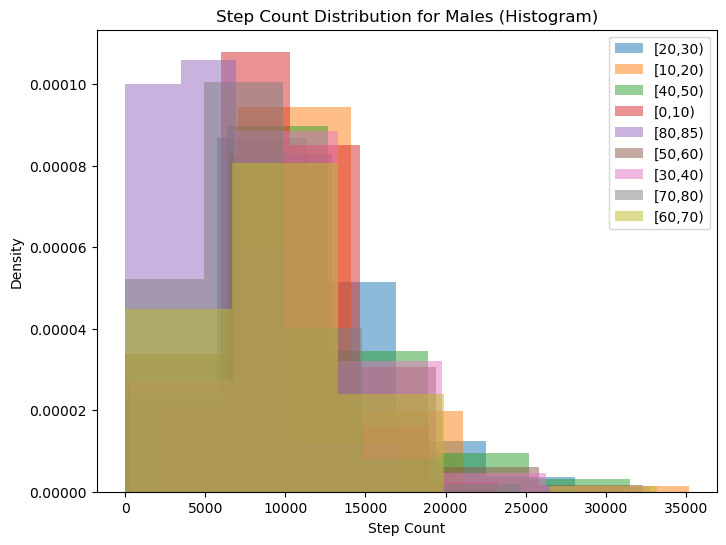

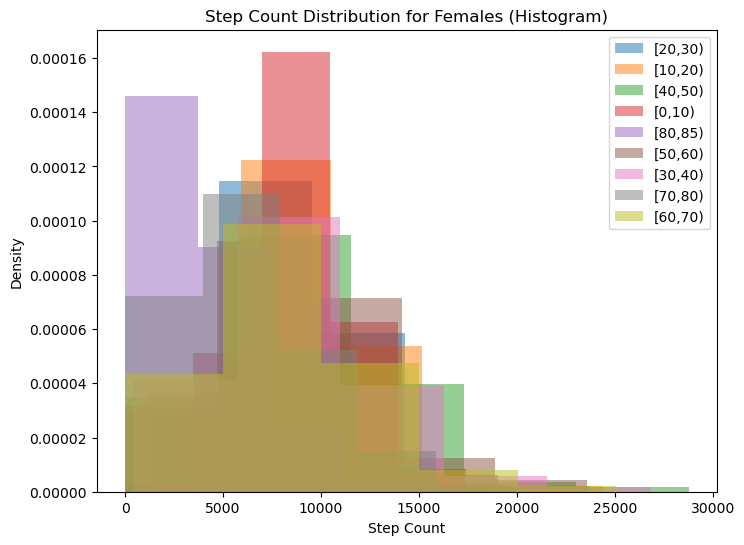

In [15]:
# Function to plot histogram with compressed bins
def plot_histogram(data, gender, bins):
    plt.figure(figsize=(8, 6))
    
    for age_group in data['age_cat'].unique():
        subset = data[data['age_cat'] == age_group]
        
        # Plot histogram with fewer bins for compression
        plt.hist(subset['value'], bins=bins, alpha=0.5, label=f"{age_group}", density=True)
    
    plt.xlabel("Step Count")
    plt.ylabel("Density")
    plt.title(f"Step Count Distribution for {gender} (Histogram)")
    plt.legend()
    plt.show()

# Plot histogram for Males with compressed bins
plot_histogram(df[df['gender'] == 'Male'], "Males", bins=5)

# Plot histogram for Females with compressed bins
plot_histogram(df[df['gender'] == 'Female'], "Females", bins=5)


In [3]:
csvfile = '/Users/rushil/Step_Count/utils/steps_all_algorithms.csv.gz'
df = pd.read_csv(csvfile, compression='gzip')

print(df.head())

         value     q gender  age_cat        algorithm      name
0  3548.000000  0.00   Male  [20,30)  total_actisteps  Actilife
1  4762.500000  0.01   Male  [20,30)  total_actisteps  Actilife
2  5120.285714  0.02   Male  [20,30)  total_actisteps  Actilife
3  6098.000000  0.03   Male  [20,30)  total_actisteps  Actilife
4  6875.142857  0.04   Male  [20,30)  total_actisteps  Actilife


In [24]:
csvfile = '/Users/rushil/Step_Count/utils/steps_survival_all_algorithms_inc10.csv.gz'
df = pd.read_csv(csvfile, compression='gzip')
#stratify by name=best guess
df = df[df['name']== 'Best guess']

print(df)

            age     sex  steps  increase         algorithm  pct_chg_survival  \
21007   [50,60)    Male      0       500  total_guesssteps          4.186401   
21008   [50,60)    Male     10       500  total_guesssteps          4.174250   
21009   [50,60)    Male     20       500  total_guesssteps          4.162136   
21010   [50,60)    Male     30       500  total_guesssteps          4.150057   
21011   [50,60)    Male     40       500  total_guesssteps          4.138014   
...         ...     ...    ...       ...               ...               ...   
144043  [60,70)  Female  29960       500  total_guesssteps          0.000159   
144044  [60,70)  Female  29970       500  total_guesssteps          0.000159   
144045  [60,70)  Female  29980       500  total_guesssteps          0.000158   
144046  [60,70)  Female  29990       500  total_guesssteps          0.000158   
144047  [60,70)  Female  30000       500  total_guesssteps          0.000157   

              name  
21007   Best guess

In [18]:
csvfile = '/Users/rushil/Step_Count/utils/steps_all_algorithms.csv.gz'
df = pd.read_csv(csvfile, compression='gzip')
names = df['name'].unique()
print(names)

['Actilife' 'ADEPT' 'Oak' 'Stepcount RF' 'Stepcount SSL'
 'Verisense revised' 'Verisense' 'Best guess']


In [21]:
import pandas as pd
import itertools

csvfile = '/Users/rushil/Step_Count/utils/steps_all_algorithms.csv.gz'
data = pd.read_csv(csvfile, compression='gzip')
data['age_cat_display'] = data['age_cat'].str.extract(r'\[(\d+),(\d+)\)').apply(lambda x: f"{x[0]}-{int(x[1]) - 1}", axis=1)


# Assume 'data' is your DataFrame

algorithms = data['name'].unique()
age_groups = data['age_cat_display'].unique()
genders = data['gender'].unique()

# All possible combinations
all_combos = pd.DataFrame(
    list(itertools.product(algorithms, age_groups, genders)),
    columns=['name', 'age_cat_display', 'gender']
)

# Existing combos in your data
existing_combos = data[['name', 'age_cat_display', 'gender']].drop_duplicates()

# Merge to find missing
merged = all_combos.merge(existing_combos, on=['name', 'age_cat_display', 'gender'], how='left', indicator=True)
missing = merged[merged['_merge'] == 'left_only'][['name', 'age_cat_display', 'gender']]

print("Missing combinations:")
print(missing)

Missing combinations:
Empty DataFrame
Columns: [name, age_cat_display, gender]
Index: []


In [3]:
csvfile = '/Users/rushil/Step_Count/utils/steps_survival_all_algorithms_inc10_all.csv.gz'
df = pd.read_csv(csvfile, compression='gzip')
names = df['sex'].unique()

print(names)
print(df.head())

['Male' 'Female' 'Overall']
       age   sex  steps  increase        algorithm  pct_chg_survival      name
0  [50,60)  Male      0       500  total_actisteps          5.520414  Actilife
1  [50,60)  Male     10       500  total_actisteps          5.509060  Actilife
2  [50,60)  Male     20       500  total_actisteps          5.497730  Actilife
3  [50,60)  Male     30       500  total_actisteps          5.486425  Actilife
4  [50,60)  Male     40       500  total_actisteps          5.475142  Actilife


In [34]:
print(df['age'].unique())
#print the data structure
print(df['age'][0]) 


['[50,60)' '[70,80)' '[60,70)']
[50,60)
